# GPS Analysis

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from scipy.signal import find_peaks
from utils import *

<IPython.core.display.Javascript object>


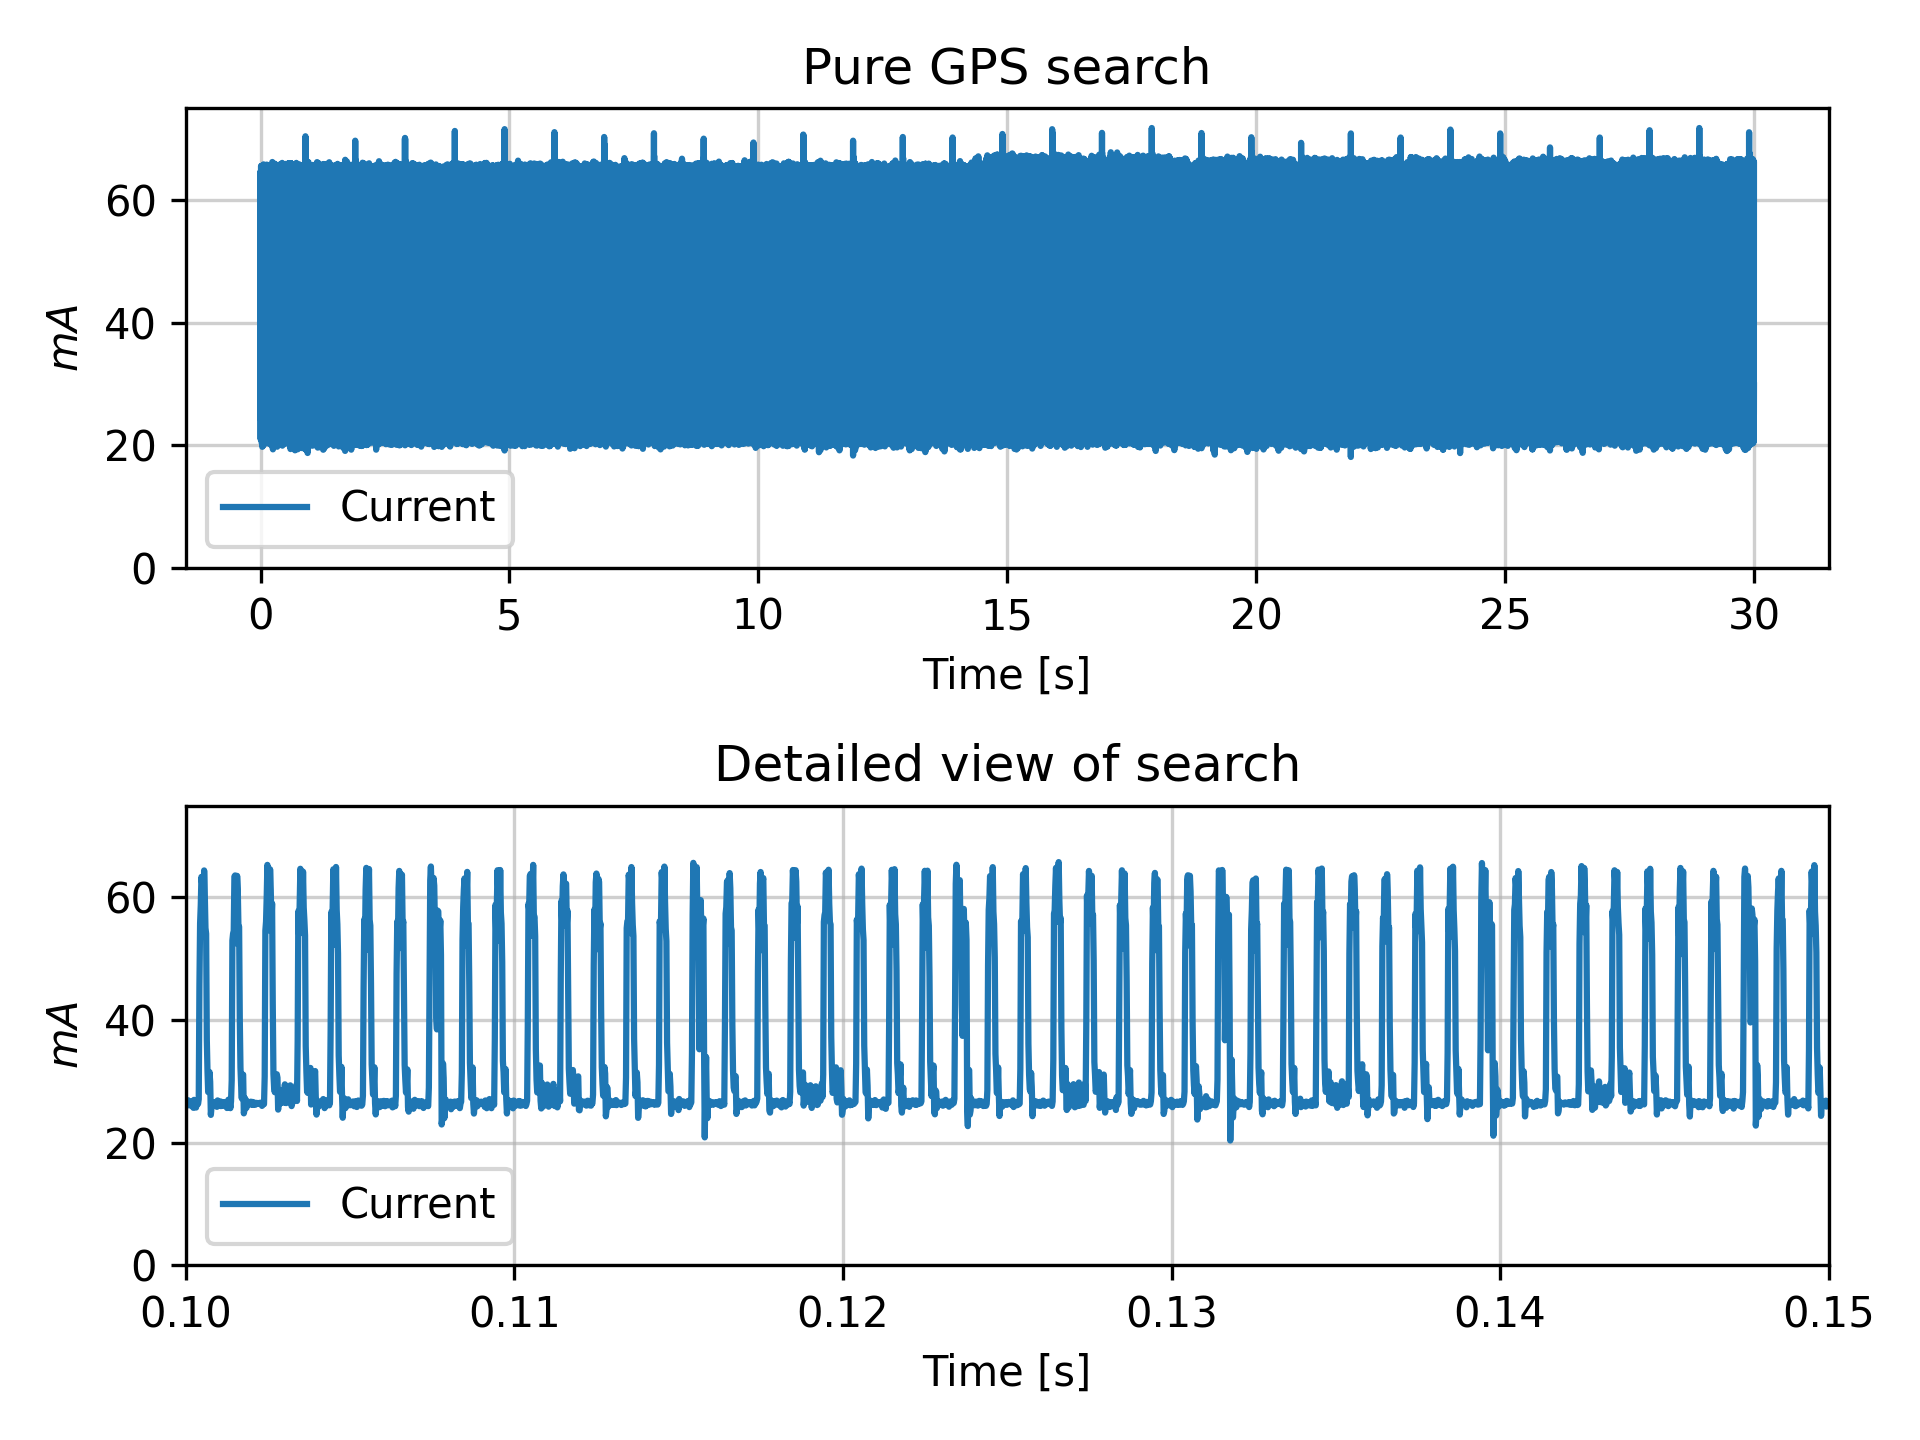

In [6]:
df = import_dlog("pure_gps_search.csv")
df["Curr"] = 1000 * df["Curr"]

fig, ax = plt.subplots(2,1,sharey=True)
fig.dpi = 300

df.plot(ax=ax[0], xlabel="Time [s]", ylabel="$mA$", ylim=(0, 75), title="Pure GPS search")
df.plot(ax=ax[1], xlabel="Time [s]", ylabel="$mA$", ylim=(0, 75), xlim=(0.1,0.15), title="Detailed view of search")
for a in ax:
    a.grid(alpha=.6)
    a.legend(["Current"])
    
plt.tight_layout()
#save_plot("gps_searching.png")
plt.show()


In [7]:
mean_curr = df.Curr.mean()

print(f"GPS Search mean current: {mean_curr} mA")


GPS Search mean current: 35.19437327797362 mA


## Time spent to get fix

<IPython.core.display.Javascript object>


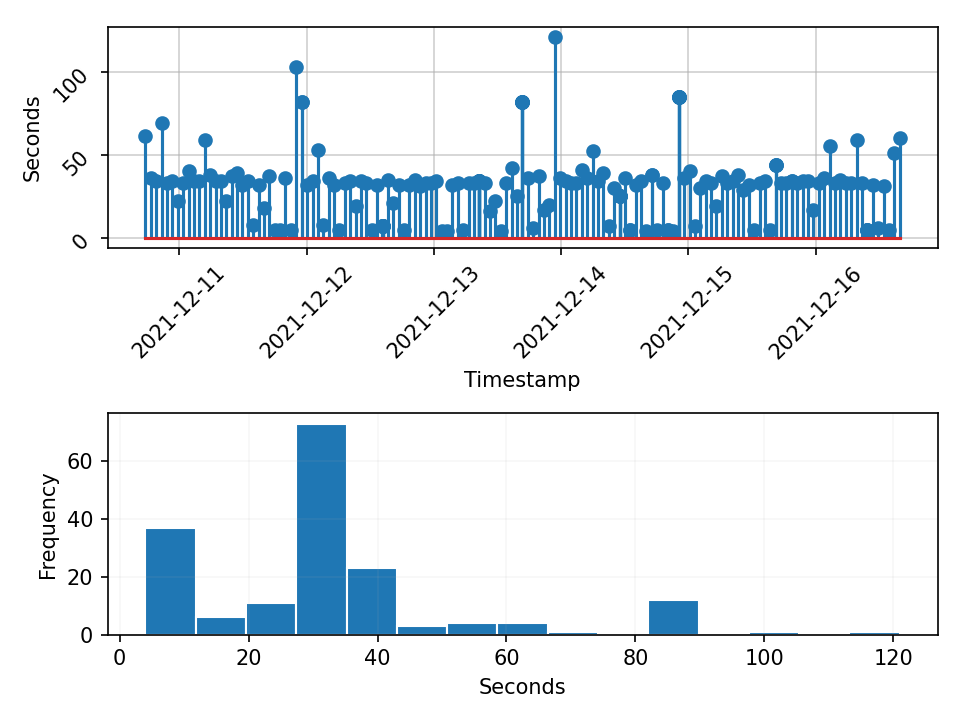

Mean energy spent to get fix: 1145.216907744062 mC, 32.53977272727273s
Min and max time spent to get fix: 4.0 s, 121.0 s


In [8]:
fig, ax = plt.subplots(2,1)
fig.dpi = 150


df = pd.read_csv("time_spent_to_get_fix.csv", index_col=0, parse_dates=True)

ax[0].stem(df.index, df.time_spent_to_get_fix)
ax[0].set_xlabel("Timestamp")
ax[0].set_ylabel("Seconds")
ax[0].grid(alpha=.6)
ax[0].tick_params(rotation=45)


ax[1].hist(df.time_spent_to_get_fix, bins=15, edgecolor="white")

ax[1].set_xlabel("Seconds")
ax[1].set_ylabel("Frequency")
ax[1].grid(alpha=.1)
    
plt.tight_layout()
plt.show()

mean_time_to_get_fix = df.time_spent_to_get_fix.mean()

print(f"Mean energy spent to get fix: {mean_time_to_get_fix*mean_curr} mC, {mean_time_to_get_fix}s")
print(f"Min and max time spent to get fix: {df.time_spent_to_get_fix.min()} s, {df.time_spent_to_get_fix.max()} s")
save_plot("gps_time_spent_to_get_fix.png")